## INSURANCE LINER DATASET

- Data Reading

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [101]:
from warnings import filterwarnings
filterwarnings("ignore")

In [102]:
path = r"D:\ML\insuranceLiner.xlsx"

In [103]:
df = pd.read_excel(path)

In [104]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Basic data quality check

In [105]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [107]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [108]:
df.duplicated().sum()

np.int64(1)

In [109]:
df.drop_duplicates(inplace = True , ignore_index = True)

### Seperation of X and Y

In [110]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [111]:
x = df.drop('charges', axis=1)
y = df['charges']

In [112]:
x.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

## Sepration Of Cat and Numerical Data

In [113]:
cat = x.columns[x.dtypes=='object']
num = x.columns[x.dtypes!='object']

In [114]:
print(cat)
print()
print(num)

Index(['sex', 'smoker', 'region'], dtype='object')

Index(['age', 'bmi', 'children'], dtype='object')


In [115]:
x.shape

(1337, 6)

In [116]:
a = y.value_counts()
a

charges
16884.92400    1
1725.55230     1
4449.46200     1
21984.47061    1
3866.85520     1
              ..
10600.54830    1
2205.98080     1
1629.83350     1
2007.94500     1
29141.36030    1
Name: count, Length: 1337, dtype: int64

<Axes: xlabel='charges'>

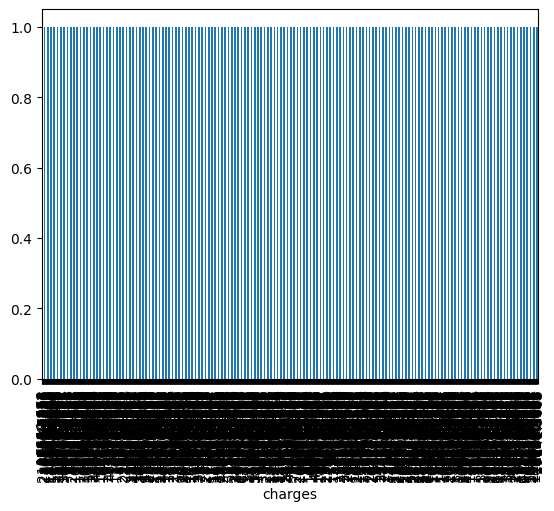

In [117]:
a.plot(kind='bar')

## Create Pipeline

In [118]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder , StandardScaler , OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [119]:
num_pipeline = Pipeline(steps=[
    ('imputer' , SimpleImputer(strategy='median')), 
    ('scaler' , StandardScaler())  
])                     

cat_pipeline = Pipeline(steps=[
    ('imputer' , SimpleImputer(strategy='most_frequent')),  
    ('encoder' , OneHotEncoder(handle_unknown='ignore', sparse_output=False))               
])



## Compose all pipelines

In [120]:
pre = ColumnTransformer(transformers=[
    ('num' , num_pipeline , num),      
    ('cat' , cat_pipeline , cat)
])

In [121]:
pre

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


## Apply to Data

In [122]:
x_scaled = pre.fit_transform(x)

In [123]:
x_scaled

array([[-1.44041773, -0.45315959, -0.90923416, ...,  0.        ,
         0.        ,  1.        ],
       [-1.51164747,  0.50942165, -0.07944162, ...,  0.        ,
         1.        ,  0.        ],
       [-0.79935006,  0.3831546 ,  1.58014347, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.51164747,  1.01448983, -0.90923416, ...,  0.        ,
         1.        ,  0.        ],
       [-1.29795825, -0.79752426, -0.90923416, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.55123139, -0.26129928, -0.90923416, ...,  1.        ,
         0.        ,  0.        ]], shape=(1337, 11))

In [124]:
#  convert  in dataframe
x_scaled =  pd.DataFrame(x_scaled , columns=pre.get_feature_names_out())

In [125]:
x_scaled

,num__age,num__bmi,num__children,cat__sex_female,cat__sex_male,cat__smoker_no,cat__smoker_yes,cat__region_northeast,cat__region_northwest,cat__region_southeast,cat__region_southwest
0,-1.440418,-0.453160,-0.909234,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-1.511647,0.509422,-0.079442,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.799350,0.383155,1.580143,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.443201,-1.305052,-0.909234,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.514431,-0.292456,-0.909234,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1332,0.767704,0.050269,1.580143,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1333,-1.511647,0.206053,-0.909234,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1334,-1.511647,1.014490,-0.909234,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1335,-1.297958,-0.797524,-0.909234,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [126]:
x.shape

(1337, 6)

## Train Test Split

In [127]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x_scaled , y , test_size=0.2 , random_state=4)

In [128]:
print(x_train.shape , y_train.shape)
print(x_test.shape , y_test.shape)


(1069, 11) (1069,)
(268, 11) (268,)


In [129]:
x_train.head()

,num__age,num__bmi,num__children,cat__sex_female,cat__sex_male,cat__smoker_no,cat__smoker_yes,cat__region_northeast,cat__region_northwest,cat__region_southeast,cat__region_southwest
127,0.910164,1.104681,-0.909234,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
578,0.910164,-0.075998,-0.079442,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
385,-1.440418,0.612731,-0.909234,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1203,-1.511647,-0.554829,1.580143,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
413,-1.013039,-1.109092,3.239729,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [130]:
y_train.head()

127      9634.5380
578      9724.5300
385      1261.8590
1203    18223.4512
413      5080.0960
Name: charges, dtype: float64

In [131]:
x_test.head()

,num__age,num__bmi,num__children,cat__sex_female,cat__sex_male,cat__smoker_no,cat__smoker_yes,cat__region_northeast,cat__region_northwest,cat__region_southeast,cat__region_southwest
726,-0.728120,-1.460836,-0.079442,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
260,1.337542,-0.895914,-0.909234,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
902,0.696474,1.014490,-0.909234,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
566,-0.087053,1.623687,-0.079442,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
776,0.411556,1.499060,-0.909234,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [132]:
y_test.head()

726    16657.71745
260    11837.16000
902     8125.78450
566     6373.55735
776     7448.40395
Name: charges, dtype: float64

## MODEL FITTING 

In [133]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors=5)



In [134]:
KNN.fit(x_train , y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [135]:
KNN.score(x_train , y_train)

0.8440921336968048

In [136]:
KNN.score(x_test , y_test)

0.7866671795207615

## GRID SEARCH CV

In [137]:
from sklearn.model_selection import GridSearchCV
model = KNeighborsRegressor()
params = {'n_neighbors': range(3,15),
          'metric': ['euclidean', 'manhattan', 'minkowski']
         }

In [138]:
KNNGrid = GridSearchCV(estimator=model ,  
                            cv=5 ,
                            n_jobs=-1 ,
                            param_grid=params ,
                            scoring='r2'
                            )

In [140]:
KNNGrid.fit(x_train , y_train)

,estimator,KNeighborsRegressor()
,param_grid,"{'metric': ['euclidean', 'manhattan', ...], 'n_neighbors': range(3, 15)}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,3


In [141]:
KNNGrid.best_params_

{'metric': 'manhattan', 'n_neighbors': 3}

In [142]:
KNNGrid.score(x_train , y_train)

0.890228678988307

In [143]:
KNNGrid.score(x_test , y_test)

0.7772031174797138

In [144]:
## Model performance metrics
from sklearn.metrics import (mean_absolute_error , 
                             mean_squared_error , 
                             root_mean_squared_error,
                             mean_absolute_percentage_error,
                             r2_score)
def evaluate(model,x , y):
    pred  = model.predict(x)
    MSE = mean_squared_error(y , pred)
    RMSE = root_mean_squared_error(y , pred)
    MAE = mean_absolute_error(y , pred)
    MAPE = mean_absolute_percentage_error(y , pred)
    R2 = r2_score(y , pred)

    print(f"MSE---> {MSE}")
    print(f"RMSE---> {RMSE}")
    print(f"MAE---> {MAE}")
    print(f"MAPE---> {MAPE}")
    print(f"R2---> {R2}")
    

In [145]:
## Check evaluation on grid KNN training
evaluate(KNN , x_train , y_train)

MSE---> 23612819.52463542
RMSE---> 4859.302370159262
MAE---> 3010.221478503648
MAPE---> 0.30888893044076426
R2---> 0.8440921336968048


In [146]:
evaluate(KNNGrid , x_train , y_train)

MSE---> 16625270.125814069
RMSE---> 4077.409732393112
MAE---> 2358.3555415104465
MAPE---> 0.2294062900700521
R2---> 0.890228678988307


In [148]:
## Teasting evaluation
evaluate(KNN , x_test , y_test)

MSE---> 26790572.219807845
RMSE---> 5175.960994811287
MAE---> 2968.402209985821
MAPE---> 0.3233049286702859
R2---> 0.7866671795207615


In [149]:
evaluate(KNNGrid , x_test , y_test)

MSE---> 27979079.628249973
RMSE---> 5289.525463427695
MAE---> 2912.6748794776113
MAPE---> 0.3221584929911413
R2---> 0.7772031174797138


## Decision Tree Regression

In [150]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=4)

In [151]:
DT.fit (x_train , y_train)  

,criterion,'squared_error'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [154]:
DT.score(x_train , y_train)

0.8690997332563295

In [155]:
DT.score(x_test , y_test)

0.8556702334034949

In [156]:
evaluate(DT , x_train , y_train)

MSE---> 19825326.634475157
RMSE---> 4452.564051698208
MAE---> 2619.8771619819527
MAPE---> 0.2794466717054355
R2---> 0.8690997332563295


In [158]:
evaluate(DT , x_test , y_test)

MSE---> 18125092.176559787
RMSE---> 4257.357417055771
MAE---> 2419.370086382902
MAPE---> 0.2788777747823842
R2---> 0.8556702334034949


In [159]:
## Grid Search CV for Decision Tree
DTmodel = DecisionTreeRegressor()
params = {'max_depth': range(4,10)}
GridDT = GridSearchCV(DTmodel , param_grid=params , cv=5 , n_jobs=-1 , scoring='r2')

In [160]:
GridDT.fit(x_train , y_train)

,estimator,DecisionTreeRegressor()
,param_grid,"{'max_depth': range(4, 10)}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [161]:
evaluate(GridDT , x_train , y_train)

MSE---> 19825326.634475157
RMSE---> 4452.564051698208
MAE---> 2619.8771619819527
MAPE---> 0.27944667170543563
R2---> 0.8690997332563295


In [162]:
evaluate(GridDT , x_test , y_test)

MSE---> 18125092.17655979
RMSE---> 4257.357417055771
MAE---> 2419.3700863829026
MAPE---> 0.27887777478238424
R2---> 0.8556702334034949


## Linear Regression

In [163]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [164]:
LR.fit(x_train , y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [165]:
evaluate(LR , x_train , y_train)

MSE---> 37130688.14480461
RMSE---> 6093.495560415598
MAE---> 4250.192416235064
MAPE---> 0.42542139436770426
R2---> 0.7548379871795419


In [166]:
evaluate(LR , x_test , y_test)

MSE---> 34847537.91248279
RMSE---> 5903.180321867425
MAE---> 4126.465266241464
MAPE---> 0.4508414750922211
R2---> 0.722509713916052


## Check for Random forest regressor , Gradient Boosting Regressor , XGBoost 

##### From above models Decision Tree giving us best performance which we have to use for future predictions .